In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from numpy import random

from tqdm import tqdm, tqdm_notebook, trange

In [54]:
#============================================FUNCTION ISING========================================
def ising(numiter,N,T,H):
    "the ising function"
    J  = 1.
    k  = 1.
    mu = 1.

    #generate empy arrays for storing Momentum M and energy E
    M  = np.array([])
    E  = np.array([])
    M2 = np.array([])
    E2 = np.array([])
    # Generate initial spins matrix

    grid = np.random.randint(0, 2, size=(N, N))
    grid = grid.astype(float)

    grid = (grid - 0.5) * 2
    grid = grid.astype(int)

    plt.figure(figsize = (3, 3))
    plt.imshow(grid * 128, cmap = 'bone')
    plt.show()

    for i in trange(numiter+1):

        x, y = np.random.randint(0, N, size=2)
        flip_spin = False

        # Rolled arrays for neighbor calculation
        x1 = np.roll(grid, +1, axis=1)
        x2 = np.roll(grid, -1, axis=1)
        x3 = np.roll(grid, +1, axis=0)
        x4 = np.roll(grid, -1, axis=0)

        dx = x1 + x2 + x3 + x4

        dE = 2. * J * grid[x, y] * dx[x, y] + 2. * H * grid[x, y]

        if dE <= 0: flip_spin = True
        elif np.random.random() < np.exp(-dE/k/T): flip_spin = True

        if flip_spin: grid[x, y] *= -1

        currM = np.sum(mu * grid)
        currE = np.sum(-0.5 * J * grid * dx - H * grid)

        M = np.append(M, currM/N)
        E = np.append(E, currE/N)
        M2 = np.append(M2, currM ** 2/N)
        E2 = np.append(E2, currE ** 2/N)

        #the array of spins is called grid, filled with +1 and -1, representing spins up and down
        #print every 1000 iteration, in this example
        if (i%10000 == 0 and i > 0):
                
                fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

                ax1.set_xlabel("i = %d, T = %0.1f, M = %0.1f, E = %0.1f" %(i, T, currM, currE), fontsize="x-small")
                ax1.imshow((grid+1) * 128, cmap = 'bone', interpolation="nearest")

                tgrid = range(1,i+1)
                ax2.plot(tgrid, M[:-1],'bo', markersize = 1)
                ax2.set_xlabel("iteration")
                ax2.set_ylabel("Instantaneaous Momentum")

                tgrid = range(1,i+1)
                ax3.plot(tgrid, E[:-1],'go', markersize = 1)
                ax3.set_xlabel("iteration")
                ax3.set_ylabel("Instantaneaous Energy")
                fig.show()
                #plt.pause(0.000000001)

    Mmean = np.mean(M)
    Emean = np.mean(E)
    Mmean2 = np.mean(M2)
    Emean2 = np.mean(E2)

    return Mmean,Emean,Mmean2,Emean2

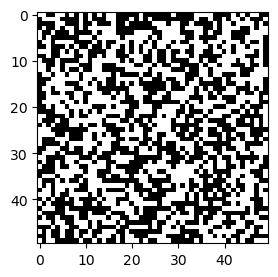

 12%|█▏        | 9782/80001 [00:01<00:08, 8507.54it/s]C:\Users\user\AppData\Local\Temp\ipykernel_14976\780182830.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
100%|██████████| 80001/80001 [00:13<00:00, 6148.07it/s]


(11.588638642016974, -80.41956725540932, 7747.763557955525, 333982.3119541006)

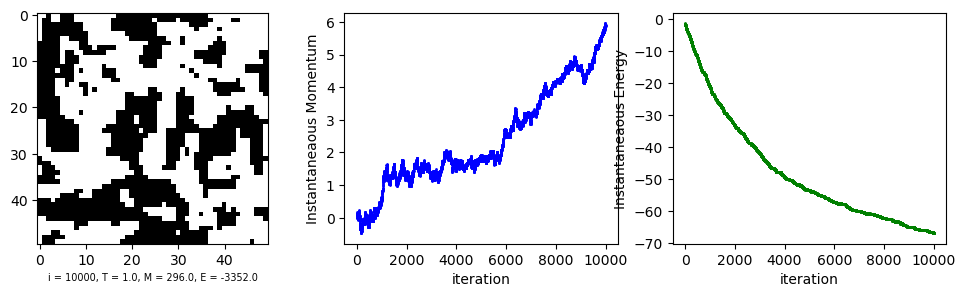

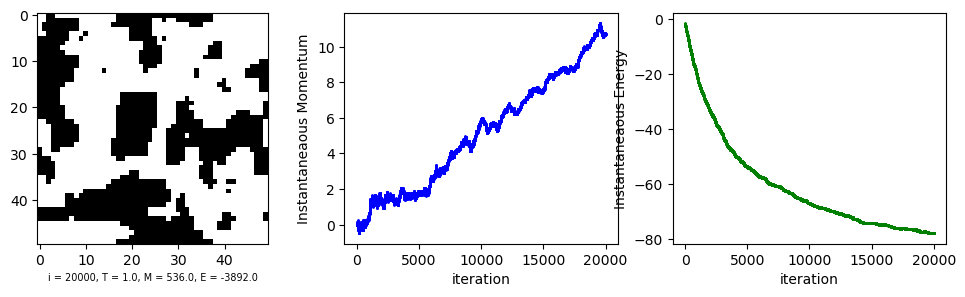

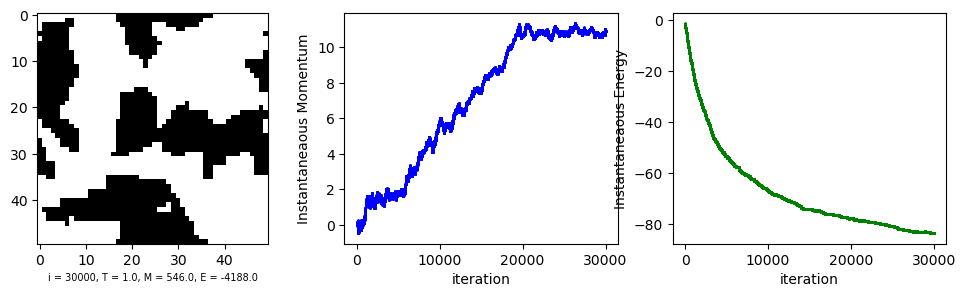

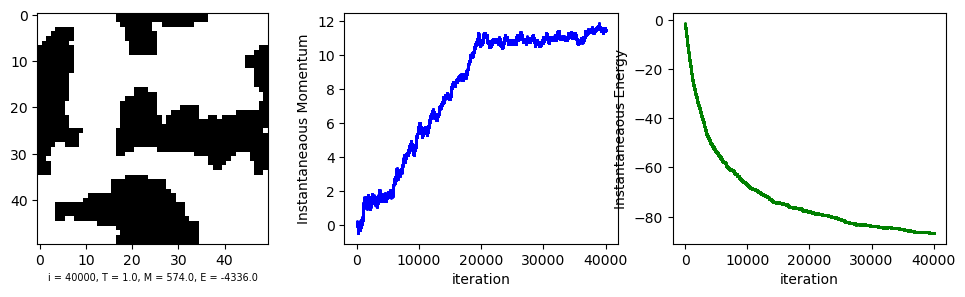

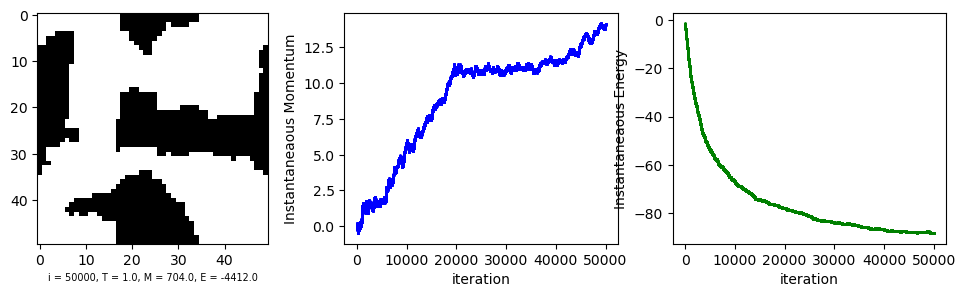

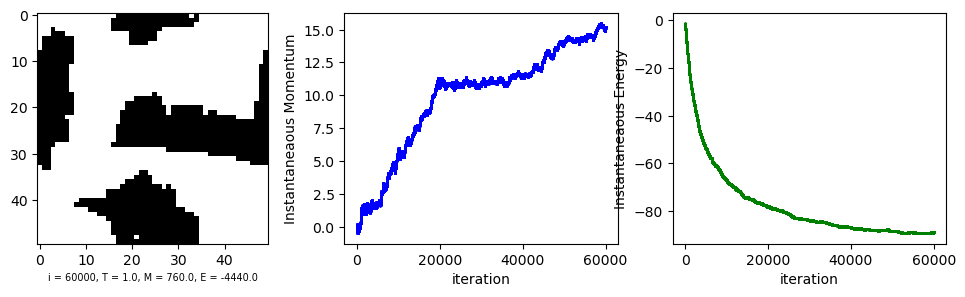

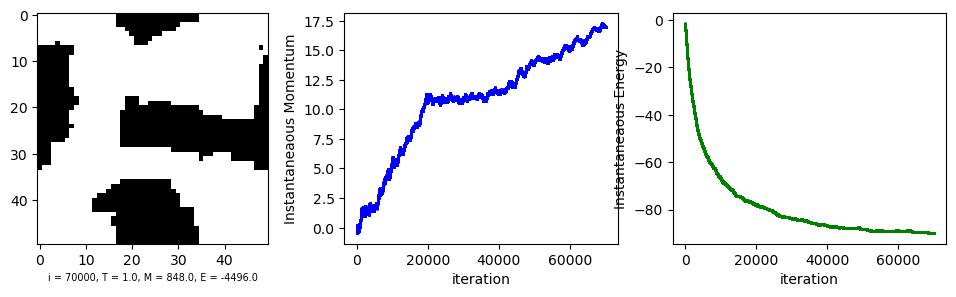

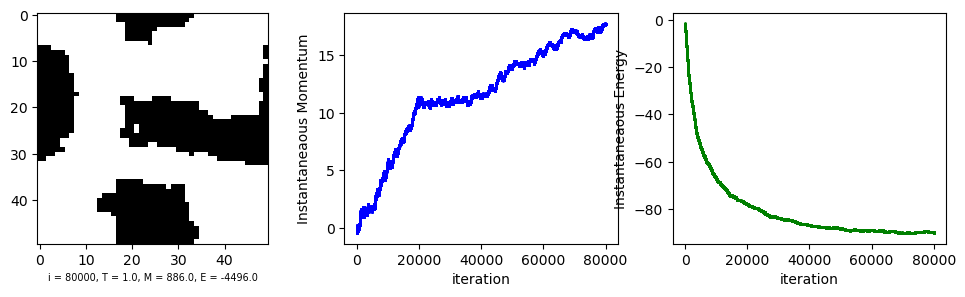

In [60]:
ising(80000, 50, 1, 0)